In [2]:
#!pip install graphviz

In [3]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.model_selection import GridSearchCV, train_test_split 
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier
import graphviz
from sklearn.tree import export_graphviz
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier


In [4]:
data = pd.read_csv(r'./datafile/customer_churn.csv')

In [5]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
print(data.Churn.value_counts())
print(data.SeniorCitizen.value_counts())
data.gender.value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64


gender
Male      3555
Female    3488
Name: count, dtype: int64

In [8]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


array([[<Axes: title={'center': 'SeniorCitizen'}>]], dtype=object)

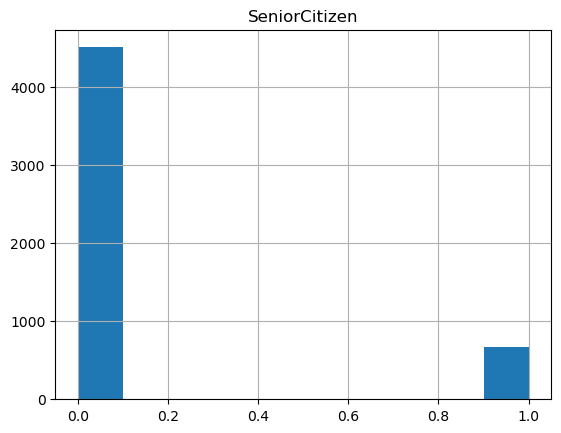

In [9]:
data[[ 'SeniorCitizen']].where(data.Churn == 'No').hist()

In [10]:
data = data.drop(columns=['customerID'],axis=1)

In [11]:
new_data = data.copy()

In [12]:
new_data['gender'] = new_data.gender.apply(lambda x: 0 if x=='Female' else 1)

In [13]:
new_data['Partner']  = new_data.Partner.apply(lambda x: 0 if x == 'No' else 1)

In [14]:
new_data['MultipleLines']  = new_data.Partner.apply(lambda x: 1 if x == 'Yes' else 0)
new_data['Dependents']  = new_data.Partner.apply(lambda x: 0 if x == 'No' else 1)
new_data['PhoneService']  = new_data.Partner.apply(lambda x: 0 if x == 'No' else 1)
new_data['OnlineSecurity']  = new_data.Partner.apply(lambda x: 0 if x == 'No' else 1)
new_data['DeviceProtection']  = new_data.DeviceProtection.apply(lambda x: 0 if x == 'No' else 1)
new_data['TechSupport']  = new_data.TechSupport.apply(lambda x: 0 if x == 'No' else 1)
new_data['StreamingTV']  = new_data.StreamingTV.apply(lambda x: 0 if x == 'No' else 1)
new_data['StreamingMovies']  = new_data.StreamingMovies.apply(lambda x: 0 if x == 'No' else 1)
new_data['PaperlessBilling']  = new_data.PaperlessBilling.apply(lambda x: 0 if x == 'No' else 1)
new_data['Churn']  = new_data.Churn.apply(lambda x: 0 if x == 'No' else 1)

In [15]:
new_data['OnlineBackup']  = new_data.Churn.apply(lambda x: 0 if x == 'No' else 1)

In [16]:
def one_hot_encode(df, columns):
    """
    Performs one-hot encoding on a specified column of a DataFrame.

    Parameters:
    - df (pd.DataFrame): The DataFrame containing the column to be encoded.
    - column (str): The name of the column to be one-hot encoded.

    Returns:
    - pd.DataFrame: A new DataFrame with the one-hot encoded columns.
    """
    # Perform one-hot encoding using pandas get_dummies
    for column in columns:
        one_hot = pd.get_dummies(df[column], prefix=column,dtype=int )
        
        # Drop the original column and concatenate the new one-hot encoded columns
        df = df.drop(column, axis=1)
        df = pd.concat([df, one_hot], axis=1)
    return df

In [17]:
df1 = one_hot_encode(new_data,['InternetService','Contract','PaymentMethod'])

In [18]:
X= df1.drop(columns='Churn',axis=1)
y = df1['Churn']

In [19]:
X['TotalCharges'] = pd.to_numeric(X['TotalCharges'], errors='coerce').fillna(0)

In [20]:
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on your data and transform it
X_scaled = scaler.fit_transform(X)

# If you want to inverse the transformation later (return to original scale), you can use:
#X_original = scaler.inverse_transform(X_scaled)


In [21]:
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)

In [22]:
X_scaled

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-1.009559,-0.439916,1.034530,0.0,-1.277445,0.0,0.0,0.0,0.0,-1.129427,...,1.381712,-0.885660,-0.525927,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,1.406418,-0.544807
1,0.990532,-0.439916,-0.966622,0.0,0.066327,0.0,0.0,0.0,0.0,0.885405,...,1.381712,-0.885660,-0.525927,-1.105970,1.944582,-0.562975,-0.529885,-0.525047,-0.711026,1.835513
2,0.990532,-0.439916,-0.966622,0.0,-1.236724,0.0,0.0,0.0,0.0,-1.129427,...,1.381712,-0.885660,-0.525927,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,-0.711026,1.835513
3,0.990532,-0.439916,-0.966622,0.0,0.514251,0.0,0.0,0.0,0.0,0.885405,...,1.381712,-0.885660,-0.525927,-1.105970,1.944582,-0.562975,1.887201,-0.525047,-0.711026,-0.544807
4,-1.009559,-0.439916,-0.966622,0.0,-1.236724,0.0,0.0,0.0,0.0,-1.129427,...,-0.723740,1.129102,-0.525927,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,1.406418,-0.544807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.990532,-0.439916,1.034530,0.0,-0.340876,0.0,0.0,0.0,0.0,0.885405,...,1.381712,-0.885660,-0.525927,-1.105970,1.944582,-0.562975,-0.529885,-0.525047,-0.711026,1.835513
7039,-1.009559,-0.439916,1.034530,0.0,1.613701,0.0,0.0,0.0,0.0,0.885405,...,-0.723740,1.129102,-0.525927,-1.105970,1.944582,-0.562975,-0.529885,1.904590,-0.711026,-0.544807
7040,-1.009559,-0.439916,1.034530,0.0,-0.870241,0.0,0.0,0.0,0.0,-1.129427,...,1.381712,-0.885660,-0.525927,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,1.406418,-0.544807
7041,0.990532,2.273159,1.034530,0.0,-1.155283,0.0,0.0,0.0,0.0,-1.129427,...,-0.723740,1.129102,-0.525927,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,-0.711026,1.835513


In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, test_size=0.30)

In [24]:
# Create the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [25]:
y_pred = model.predict(X_test)


In [26]:
# Accuracy
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(Y_test, y_pred)
print("Classification Report:")
print(class_report)

Accuracy: 0.80
Confusion Matrix:
[[1397  164]
 [ 266  286]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1561
           1       0.64      0.52      0.57       552

    accuracy                           0.80      2113
   macro avg       0.74      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113



Using Gride search CV

In [27]:
# Define the parameter grid
param_grid = {
     'max_features': ['auto', 'sqrt', 'log2'],
    'n_estimators': [50, 100, 200],         # Number of trees
    'max_depth': [None, 10, 20, 30],        # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],        # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],          # Minimum samples required at a leaf node
    'bootstrap': [True, False]              # Whether bootstrap samples are used when building trees
}
param_grid2 = {
     'max_features': ['auto', 'sqrt', 'log2'],
    'n_estimators': [50],         # Number of trees
    'max_depth': [10],        # Maximum depth of each tree
    'min_samples_split': [ 10],        # Minimum samples required to split a node
    'min_samples_leaf': [ 2],          # Minimum samples required at a leaf node
    'bootstrap': [True]              # Whether bootstrap samples are used when building trees
}


In [28]:

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')


In [29]:
#grid_search.fit(X_train,Y_train)

In [30]:
#Best params
grid_search.best_params_, str(round(grid_search.best_score_*100,2))+'%'

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [35]:
model2 = RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=50)
model2.fit(X_train,Y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=50)

In [32]:
y_pred_temp = model2.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred_temp)
print(f"Test Set Accuracy: {accuracy:.2f}")

Test Set Accuracy: 0.80


In [33]:

importance_df = pd.DataFrame(data= {"Features":model2.feature_names_in_,"Values":model2.feature_importances_})


In [36]:
top_imp_df = importance_df.sort_values(ascending=False,by='Values').head(10)

In [37]:
updated_X_train, updated_X_test = X_train[list(top_imp_df.Features)],X_test[list(top_imp_df.Features)]

#list(top_imp_df.Features)

In [38]:

model3 = RandomForestClassifier(bootstrap= True,
  max_depth= 10,
  max_features= 'sqrt',
  min_samples_leaf= 4,
  min_samples_split= 2,
  n_estimators= 100)

model3.fit(updated_X_train,Y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=4)

In [39]:
model3_pred = model3.predict(updated_X_test)

In [40]:
model4 = RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=50)

model4.fit(updated_X_train,Y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=50)

In [41]:
model4_pred = model4.predict(updated_X_test)

In [42]:
# Accuracy
accuracy_score(Y_test, model4_pred),accuracy_score(Y_test, model3_pred), accuracy_score(Y_test,y_pred_temp), accuracy_score(Y_test,y_pred)


(0.7979176526265973, 0.8045433033601515, 0.8035967818267865, 0.79649787032655)

In [44]:
updated_X_train.describe()

,tenure,TotalCharges,Contract_Month-to-month,MonthlyCharges,TechSupport,InternetService_Fiber optic,PaymentMethod_Electronic check,Contract_Two year,InternetService_No,DeviceProtection
count,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000
mean,-0.006011,-0.007543,0.009197,-0.007012,0.004889,-0.001698,-0.005784,-0.004971,0.010252,0.005091
std,0.996867,0.997143,0.999131,1.003225,1.000022,0.999893,0.998071,0.997069,1.007076,0.999467
min,-1.318165,-1.005780,-1.105970,-1.545860,-1.013869,-0.885660,-0.711026,-0.562975,-0.525927,-1.129427
25%,-0.951682,-0.829406,-1.105970,-0.995390,-1.013869,-0.885660,-0.711026,-0.562975,-0.525927,-1.129427
50%,-0.177995,-0.396661,0.904184,0.183240,0.986321,-0.885660,-0.711026,-0.562975,-0.525927,0.885405
75%,0.921455,0.657094,0.904184,0.833833,0.986321,1.129102,1.406418,-0.562975,-0.525927,0.885405
max,1.613701,2.819320,0.904184,1.791029,0.986321,1.129102,1.406418,1.776278,1.901403,0.885405


In [45]:
# Make predictions with the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
print(f"Test Set Accuracy: {accuracy:.2f}")

conf_matrix = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(Y_test, y_pred)
print("Classification Report:")
print(class_report)


AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [46]:
nb_model1 = GaussianNB()
nb_model2 = BernoulliNB()

In [47]:
nb_model1.fit(X_train,Y_train)
nb_model2.fit(X_train,Y_train)

BernoulliNB()

In [48]:
nb_model_pred = nb_model1.predict(X_test)
nb_model_pred2 = nb_model2.predict(X_test)

In [49]:
accuracy_score(Y_test,nb_model_pred),accuracy_score(Y_test,nb_model_pred2)

(0.7203028868906768, 0.7477520113582584)

In [50]:
# Define the model


# Define the parameter grid
param_grid = {
    'loss': ['hinge', 'log', 'modified_huber'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'max_iter': [1000, 2000, 3000],
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'eta0': [0.01, 0.1, 1.0],
}



In [51]:
sdg_model1 = SGDClassifier()
sdg_model2 = SGDClassifier(random_state=42)


In [79]:
# GridSearchCV
grid_search_sgd = GridSearchCV(sdg_model2, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)


In [53]:
sdg_model1.fit(X_train,Y_train)
sdg_model2.fit(X_train,Y_train)

SGDClassifier(random_state=42)

In [80]:
# Fit the model
grid_search_sgd.fit(X_train, Y_train)

# Get the best parameters
print(f"Best parameters: {grid_search.best_params_}")


Fitting 5 folds for each of 1296 candidates, totalling 6480 fits
Best parameters: {'alpha': 0.0001, 'eta0': 1.0, 'learning_rate': 'adaptive', 'loss': 'hinge', 'max_iter': 1000, 'penalty': 'l1'}


/Users/siddharthpangotra/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
2160 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
527 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/siddharthpangotra/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/siddharthpangotra/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/siddharthpangotra/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_param

In [61]:
sgd_model3= grid_search.best_estimator_

In [62]:
sdg_model3_pred = sgd_model3.predict(X_test)

In [63]:
sdg_model1_pred = sdg_model1.predict(X_test)
sdg_model2_pred = sdg_model2.predict(X_test)

In [64]:
accuracy_score(sdg_model1_pred,Y_test),accuracy_score(sdg_model2_pred,Y_test),accuracy_score(sdg_model3_pred,Y_test)

(0.7860861334595362, 0.7529578797917653, 0.8059630856601988)

In [65]:
sgd_model3.coef_[0]

array([ 0.        ,  0.07124997,  0.        ,  0.        , -0.74908214,
        0.        ,  0.        ,  0.        ,  0.        , -0.00724509,
       -0.10852457,  0.2186662 ,  0.17639577,  0.0858117 , -0.55815295,
        0.        ,  0.        ,  0.82850079, -0.55774406,  0.17123341,
        0.        ,  0.        ,  0.        , -0.01833672,  0.13120149,
       -0.02368247])

In [95]:
imp_Feature_df = pd.DataFrame(data= {"Features": list(sgd_model3.feature_names_in_),"Values":list(sgd_model3.coef_[0])})

In [96]:
imp_Feature_df.sort_values(by="Values",ascending=False)

,Features,Values
17,InternetService_Fiber optic,0.828501
11,StreamingTV,0.218666
12,StreamingMovies,0.176396
19,Contract_Month-to-month,0.171233
24,PaymentMethod_Electronic check,0.131201
13,PaperlessBilling,0.085812
1,SeniorCitizen,0.071250
22,PaymentMethod_Bank transfer (automatic),0.000000
21,Contract_Two year,0.000000
20,Contract_One year,0.000000


In [75]:
drop_cols = list(imp_Feature_df[imp_Feature_df.Values==0].Features)

In [81]:
updated_X_train, updated_X_test, Y_train, Y_test = train_test_split(X_scaled.drop(columns=drop_cols), y, test_size=0.30)

In [83]:
# Fit the model
grid_search_sgd.fit(updated_X_train, Y_train)




Fitting 5 folds for each of 1296 candidates, totalling 6480 fits
Best parameters: {'alpha': 0.0001, 'eta0': 1.0, 'learning_rate': 'adaptive', 'loss': 'hinge', 'max_iter': 1000, 'penalty': 'l1'}


/Users/siddharthpangotra/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
2160 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
382 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/siddharthpangotra/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/siddharthpangotra/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/siddharthpangotra/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_param

In [85]:
# Get the best parameters
print(f"Best parameters: {grid_search_sgd.best_params_}")

Best parameters: {'alpha': 0.0001, 'eta0': 1.0, 'learning_rate': 'adaptive', 'loss': 'modified_huber', 'max_iter': 1000, 'penalty': 'l2'}


In [86]:
sgd_model4= grid_search_sgd.best_estimator_

In [87]:
sgd_model4_pred = sgd_model4.predict(updated_X_test)

In [92]:
accuracy_score(sgd_model4_pred,Y_test)

0.8154283009938476

In [97]:
imp_Feature_df_2 = pd.DataFrame(data= {"Features": list(sgd_model4.feature_names_in_),"Values":list(sgd_model4.coef_[0])})

In [99]:
imp_Feature_df_2.sort_values(by="Values",ascending=False)

,Features,Values
8,InternetService_Fiber optic,0.276393
10,Contract_Month-to-month,0.103155
5,StreamingMovies,0.099927
4,StreamingTV,0.076443
6,PaperlessBilling,0.068419
12,PaymentMethod_Electronic check,0.068222
0,SeniorCitizen,0.042592
2,DeviceProtection,0.015073
11,PaymentMethod_Credit card (automatic),-0.009336
13,PaymentMethod_Mailed check,-0.015023
